<a href="https://colab.research.google.com/github/vpallapolu/files/blob/main/Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*Data transformation with python using pandas*

# **Data Loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
demographics_df=pd.read_csv("https://raw.githubusercontent.com/vpallapolu/files/main/DEMOGRAPHICS.csv")

In [4]:
demographics_df.columns

Index(['index', 'State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number',
       'Strata_Determining_Factors', 'Number_Counties', 'Population_Size',
       'Min_Population_Size', 'Max_Population_Size', 'Population_Density',
       'Min_Population_Density', 'Max_Population_Density', 'Poverty',
       'Min_Poverty', 'Max_Poverty', 'Age_19_Under', 'Min_Age_19_Under',
       'Max_Age_19_Under', 'Age_19_64', 'Min_Age_19_64', 'Max_Age_19_65',
       'Age_65_84', 'Min_Age_65_84', 'Max_Age_65_85', 'Age_85_and_Over',
       'Min_Age_85_and_Over', 'Max_Age_85_and_Over', 'White', 'Min_White',
       'Max_White', 'Black', 'Min_Black', 'Max_Black', 'Native_American',
       'Min_Native_American', 'Max_Native_American', 'Asian', 'Min_Asian',
       'Max_Asian', 'Hispanic', 'Min_Hispanic', 'Max_Hispanic'],
      dtype='object')

In [5]:
demographics_df.head()

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
0,0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,...,17.3,0.5,0.1,1.1,0.6,0.2,2.2,1.7,0.8,19.2
1,1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,...,14.1,0.5,0.1,1.1,0.4,0.4,3.3,2.3,0.8,13.7
2,2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,...,50.7,0.4,0.2,7.1,0.3,0.2,2.3,3.1,1.0,67.7
3,3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,...,35.4,0.3,0.1,2.6,0.1,0.1,1.5,1.4,1.2,46.9
4,4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,...,20.5,0.5,0.1,0.9,0.2,0.3,2.2,6.3,0.8,6.3


# **Dropping unnecessary columns**

In [6]:
# not useful columns are removed
demographics_df=demographics_df.drop(["index","CHSI_State_Abbr",'Min_Population_Size','Max_Population_Size','Min_Population_Density','Max_Population_Density','Min_Poverty','Max_Poverty', 'Min_Age_19_Under', 'Max_Age_19_Under','Min_Age_19_64','Max_Age_19_65','Min_Age_65_84','Max_Age_65_85','Min_Age_85_and_Over','Max_Age_85_and_Over', 'Min_White','Max_White', 'Min_Black','Max_Black', 'Min_Native_American','Max_Native_American','Min_Asian','Max_Asian','Min_Hispanic','Max_Hispanic'],axis=1)

In [7]:
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State_FIPS_Code             3141 non-null   int64  
 1   County_FIPS_Code            3141 non-null   int64  
 2   CHSI_County_Name            3141 non-null   object 
 3   CHSI_State_Name             3141 non-null   object 
 4   Strata_ID_Number            3141 non-null   int64  
 5   Strata_Determining_Factors  3141 non-null   object 
 6   Number_Counties             3141 non-null   int64  
 7   Population_Size             3141 non-null   int64  
 8   Population_Density          3141 non-null   int64  
 9   Poverty                     3141 non-null   float64
 10  Age_19_Under                3141 non-null   float64
 11  Age_19_64                   3141 non-null   float64
 12  Age_65_84                   3141 non-null   float64
 13  Age_85_and_Over             3141 

# **Renaming columns**

In [8]:
# columns are renamed
demographics_df=demographics_df.rename(columns={"CHSI_State_Name":"State","CHSI_County_Name":"County","State_FIPS_Code":"State_FIPS","County_FIPS_Code":"County_FIPS","Poverty":"Poverty_rate","Number_Counties":"CountiesPerStratum"})
demographics_df

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,29,"frontier status, population size, poverty, age",37,48612,82,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7
1,1,3,Baldwin,Alabama,16,"frontier status, population size, poverty, age",27,162586,102,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3
2,1,5,Barbour,Alabama,51,"frontier status, population size, poverty, age...",33,28414,32,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1
3,1,7,Bibb,Alabama,42,"frontier status, population size, poverty, age",53,21516,35,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4
4,1,9,Blount,Alabama,28,"frontier status, population size, poverty, age",39,55725,86,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,77,"frontier status, population size",15,37975,4,8.6,26.6,65.1,7.4,0.9,95.5,1.1,1.1,1.0,10.3
3137,56,39,Teton,Wyoming,78,"frontier status, population size, poverty, age",43,19032,5,5.6,18.8,73.3,7.5,0.4,97.9,0.2,0.4,0.8,10.2
3138,56,41,Uinta,Wyoming,38,"frontier status, population size, poverty, age",35,19939,10,10.6,29.1,63.1,7.0,0.8,97.5,0.1,1.1,0.3,5.9
3139,56,43,Washakie,Wyoming,82,"frontier status, population size, poverty, age",37,7933,4,11.1,23.5,59.5,14.6,2.3,97.2,0.2,0.8,0.7,12.1


# **Checking and removing null values(if any)**

In [9]:
demographics_df.isnull()

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3137,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
demographics_df.notna()

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3137,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3138,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3139,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


# **Changing Datatypes**

In [11]:
# changing the data type of columns
demographics_df["CountiesPerStratum"]=demographics_df["CountiesPerStratum"].astype("int32")
demographics_df["Population_Size"]=demographics_df["Population_Size"].astype("int32")
demographics_df["Population_Density"]=demographics_df["Population_Density"].astype("int32")
demographics_df["Poverty_rate"]=demographics_df["Poverty_rate"].astype("float32")
demographics_df["Age_19_Under"]=demographics_df["Age_19_Under"].astype("float32")
demographics_df["Age_19_64"]=demographics_df["Age_19_64"].astype("float32")
demographics_df["Age_65_84"]=demographics_df["Age_65_84"].astype("float32")
demographics_df["Age_85_and_Over"]=demographics_df["Age_85_and_Over"].astype("float32")
demographics_df["White"]=demographics_df["White"].astype("float32")
demographics_df["Black"]=demographics_df["Black"].astype("float32")
demographics_df["Native_American"]=demographics_df["Native_American"].astype("float32")
demographics_df["Asian"]=demographics_df["Asian"].astype("float32")
demographics_df["Hispanic"]=demographics_df["Hispanic"].astype("float32")
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State_FIPS                  3141 non-null   int64  
 1   County_FIPS                 3141 non-null   int64  
 2   County                      3141 non-null   object 
 3   State                       3141 non-null   object 
 4   Strata_ID_Number            3141 non-null   int64  
 5   Strata_Determining_Factors  3141 non-null   object 
 6   CountiesPerStratum          3141 non-null   int32  
 7   Population_Size             3141 non-null   int32  
 8   Population_Density          3141 non-null   int32  
 9   Poverty_rate                3141 non-null   float32
 10  Age_19_Under                3141 non-null   float32
 11  Age_19_64                   3141 non-null   float32
 12  Age_65_84                   3141 non-null   float32
 13  Age_85_and_Over             3141 

# **Dropping duplicates**

In [12]:
demographics_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3136    False
3137    False
3138    False
3139    False
3140    False
Length: 3141, dtype: bool

In [13]:
demographics_df.drop_duplicates()

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,29,"frontier status, population size, poverty, age",37,48612,82,10.400000,26.900000,62.299999,9.8,0.9,80.699997,17.299999,0.5,0.6,1.7
1,1,3,Baldwin,Alabama,16,"frontier status, population size, poverty, age",27,162586,102,10.200000,23.500000,60.299999,14.5,1.8,88.400002,9.900000,0.5,0.4,2.3
2,1,5,Barbour,Alabama,51,"frontier status, population size, poverty, age...",33,28414,32,22.100000,24.299999,62.500000,11.6,1.6,52.200001,46.799999,0.4,0.3,3.1
3,1,7,Bibb,Alabama,42,"frontier status, population size, poverty, age",53,21516,35,16.799999,24.600000,63.299999,10.9,1.2,76.800003,22.500000,0.3,0.1,1.4
4,1,9,Blount,Alabama,28,"frontier status, population size, poverty, age",39,55725,86,11.900000,24.500000,62.099998,12.1,1.3,97.099998,1.500000,0.5,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,77,"frontier status, population size",15,37975,4,8.600000,26.600000,65.099998,7.4,0.9,95.500000,1.100000,1.1,1.0,10.3
3137,56,39,Teton,Wyoming,78,"frontier status, population size, poverty, age",43,19032,5,5.600000,18.799999,73.300003,7.5,0.4,97.900002,0.200000,0.4,0.8,10.2
3138,56,41,Uinta,Wyoming,38,"frontier status, population size, poverty, age",35,19939,10,10.600000,29.100000,63.099998,7.0,0.8,97.500000,0.100000,1.1,0.3,5.9
3139,56,43,Washakie,Wyoming,82,"frontier status, population size, poverty, age",37,7933,4,11.100000,23.500000,59.500000,14.6,2.3,97.199997,0.200000,0.8,0.7,12.1


# **Removing whitespaces**

In [14]:
# method to remove redundant symbols, punctuation marks
demographics_df["County"]=demographics_df["County"].str.replace(' ','')
demographics_df

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,29,"frontier status, population size, poverty, age",37,48612,82,10.400000,26.900000,62.299999,9.8,0.9,80.699997,17.299999,0.5,0.6,1.7
1,1,3,Baldwin,Alabama,16,"frontier status, population size, poverty, age",27,162586,102,10.200000,23.500000,60.299999,14.5,1.8,88.400002,9.900000,0.5,0.4,2.3
2,1,5,Barbour,Alabama,51,"frontier status, population size, poverty, age...",33,28414,32,22.100000,24.299999,62.500000,11.6,1.6,52.200001,46.799999,0.4,0.3,3.1
3,1,7,Bibb,Alabama,42,"frontier status, population size, poverty, age",53,21516,35,16.799999,24.600000,63.299999,10.9,1.2,76.800003,22.500000,0.3,0.1,1.4
4,1,9,Blount,Alabama,28,"frontier status, population size, poverty, age",39,55725,86,11.900000,24.500000,62.099998,12.1,1.3,97.099998,1.500000,0.5,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,77,"frontier status, population size",15,37975,4,8.600000,26.600000,65.099998,7.4,0.9,95.500000,1.100000,1.1,1.0,10.3
3137,56,39,Teton,Wyoming,78,"frontier status, population size, poverty, age",43,19032,5,5.600000,18.799999,73.300003,7.5,0.4,97.900002,0.200000,0.4,0.8,10.2
3138,56,41,Uinta,Wyoming,38,"frontier status, population size, poverty, age",35,19939,10,10.600000,29.100000,63.099998,7.0,0.8,97.500000,0.100000,1.1,0.3,5.9
3139,56,43,Washakie,Wyoming,82,"frontier status, population size, poverty, age",37,7933,4,11.100000,23.500000,59.500000,14.6,2.3,97.199997,0.200000,0.8,0.7,12.1


# **Merging two columns into one**

In [15]:
# two columns are merged to form a new column of same data type
demographics_df["Age_65_and_over"]=demographics_df['Age_65_84']+ demographics_df['Age_85_and_Over']
demographics_df=demographics_df.drop(['Age_65_84','Age_85_and_Over'],axis=1)
demographics_df

,State_FIPS,County_FIPS,County,State,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,White,Black,Native_American,Asian,Hispanic,Age_65_and_over
0,1,1,Autauga,Alabama,29,"frontier status, population size, poverty, age",37,48612,82,10.400000,26.900000,62.299999,80.699997,17.299999,0.5,0.6,1.7,10.700000
1,1,3,Baldwin,Alabama,16,"frontier status, population size, poverty, age",27,162586,102,10.200000,23.500000,60.299999,88.400002,9.900000,0.5,0.4,2.3,16.299999
2,1,5,Barbour,Alabama,51,"frontier status, population size, poverty, age...",33,28414,32,22.100000,24.299999,62.500000,52.200001,46.799999,0.4,0.3,3.1,13.200001
3,1,7,Bibb,Alabama,42,"frontier status, population size, poverty, age",53,21516,35,16.799999,24.600000,63.299999,76.800003,22.500000,0.3,0.1,1.4,12.099999
4,1,9,Blount,Alabama,28,"frontier status, population size, poverty, age",39,55725,86,11.900000,24.500000,62.099998,97.099998,1.500000,0.5,0.2,6.3,13.400001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56,37,Sweetwater,Wyoming,77,"frontier status, population size",15,37975,4,8.600000,26.600000,65.099998,95.500000,1.100000,1.1,1.0,10.3,8.300000
3137,56,39,Teton,Wyoming,78,"frontier status, population size, poverty, age",43,19032,5,5.600000,18.799999,73.300003,97.900002,0.200000,0.4,0.8,10.2,7.900000
3138,56,41,Uinta,Wyoming,38,"frontier status, population size, poverty, age",35,19939,10,10.600000,29.100000,63.099998,97.500000,0.100000,1.1,0.3,5.9,7.800000
3139,56,43,Washakie,Wyoming,82,"frontier status, population size, poverty, age",37,7933,4,11.100000,23.500000,59.500000,97.199997,0.200000,0.8,0.7,12.1,16.900000


# **Changing the position of a column**

In [78]:
#reindexing the columns
new_columns=["State","State_FIPS","County","County_FIPS","Strata_ID_Number","Strata_Determining_Factors","CountiesPerStratum","Population_Size","Population_Density","Poverty_rate","Age_19_Under","Age_19_64","Age_65_and_over","White","Black","Native_American","Asian","Hispanic"]
demographics_df=demographics_df[new_columns]
demographics_df

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
0,Alabama,1,Autauga,1,29,"frontier status, population size, poverty, age",37,48612,82,10.400000,26.900000,62.299999,10.700000,80.699997,17.299999,0.5,0.6,1.7
1,Alabama,1,Baldwin,3,16,"frontier status, population size, poverty, age",27,162586,102,10.200000,23.500000,60.299999,16.299999,88.400002,9.900000,0.5,0.4,2.3
2,Alabama,1,Barbour,5,51,"frontier status, population size, poverty, age...",33,28414,32,22.100000,24.299999,62.500000,13.200001,52.200001,46.799999,0.4,0.3,3.1
3,Alabama,1,Bibb,7,42,"frontier status, population size, poverty, age",53,21516,35,16.799999,24.600000,63.299999,12.099999,76.800003,22.500000,0.3,0.1,1.4
4,Alabama,1,Blount,9,28,"frontier status, population size, poverty, age",39,55725,86,11.900000,24.500000,62.099998,13.400001,97.099998,1.500000,0.5,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming,56,Sweetwater,37,77,"frontier status, population size",15,37975,4,8.600000,26.600000,65.099998,8.300000,95.500000,1.100000,1.1,1.0,10.3
3137,Wyoming,56,Teton,39,78,"frontier status, population size, poverty, age",43,19032,5,5.600000,18.799999,73.300003,7.900000,97.900002,0.200000,0.4,0.8,10.2
3138,Wyoming,56,Uinta,41,38,"frontier status, population size, poverty, age",35,19939,10,10.600000,29.100000,63.099998,7.800000,97.500000,0.100000,1.1,0.3,5.9
3139,Wyoming,56,Washakie,43,82,"frontier status, population size, poverty, age",37,7933,4,11.100000,23.500000,59.500000,16.900000,97.199997,0.200000,0.8,0.7,12.1


# **Dealing with outliers**

In [17]:
demographics_df.describe()

,State_FIPS,County_FIPS,Strata_ID_Number,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
count,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,30.304680,103.716651,44.696275,38.486151,9.436816e+04,249.119389,12.638428,24.806526,60.289398,14.904840,87.017891,8.986691,1.974244,1.123050,7.017988
std,15.134423,107.999484,25.118434,10.290195,3.064317e+05,1703.041884,40.186459,3.281777,3.356056,4.110967,16.150478,14.545659,7.675446,2.757236,12.464726
min,1.000000,1.000000,1.000000,15.000000,6.200000e+01,-2222.000000,-2222.199951,1.400000,47.599998,2.200000,4.700000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,35.000000,23.000000,32.000000,1.121100e+04,17.000000,9.800000,22.700001,58.299999,12.200001,82.800003,0.500000,0.200000,0.300000,1.100000
50%,29.000000,79.000000,44.000000,37.000000,2.523500e+04,44.000000,12.600000,24.600000,60.299999,14.500000,94.099998,2.100000,0.400000,0.500000,2.300000
75%,45.000000,133.000000,66.000000,45.000000,6.404000e+04,109.000000,16.200001,26.400000,62.299999,17.200001,97.599998,10.300000,0.900000,1.000000,6.300000
max,56.000000,840.000000,88.000000,62.000000,9.935475e+06,69390.000000,36.200001,47.200001,83.300003,34.700001,100.000000,86.000000,93.400002,55.900002,97.500000


# **Identifying and removing outliers for 'population size' column**

# trimming

<Axes: >

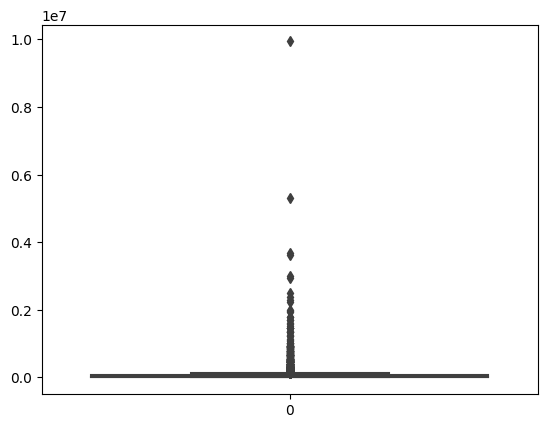

In [18]:
sns.boxplot(demographics_df["Population_Size"])

In [19]:
upperlimit=demographics_df["Population_Size"].mean()+3*demographics_df["Population_Size"].std()
lowerlimit=demographics_df["Population_Size"].mean()-3*demographics_df["Population_Size"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 1013663.131568267
lowerlimit: -824926.8030104828


In [20]:
#finding outliers
demographics_df.loc[(demographics_df["Population_Size"]>upperlimit)|(demographics_df["Population_Size"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
101,Arizona,4,Maricopa,13,1,"frontier status, population size",34,3635528,395,12.800000,28.600000,60.299999,11.099999,89.000000,4.300000,2.2,2.900000,28.700001
184,California,6,Alameda,1,1,"frontier status, population size",34,1448905,1964,10.700000,26.200001,63.299999,10.500000,56.900002,13.800000,0.7,24.900000,20.299999
190,California,6,ContraCosta,13,2,"frontier status, population size, poverty",32,1017787,1414,7.500000,27.000000,61.599998,11.400000,72.699997,9.600000,0.7,13.500000,20.700001
202,California,6,LosAngeles,37,1,"frontier status, population size",34,9935475,2447,17.700001,28.900000,61.000000,10.099999,74.099998,9.700000,1.1,13.400000,46.400002
213,California,6,Orange,59,1,"frontier status, population size",34,2988072,3785,10.600000,28.100000,61.400002,10.500000,78.900002,1.900000,0.9,16.200001,32.099998
216,California,6,Riverside,65,1,"frontier status, population size",34,1946419,270,12.300000,29.799999,58.799999,11.500000,84.500000,6.500000,1.4,5.200000,40.500000
217,California,6,Sacramento,67,1,"frontier status, population size",34,1363482,1412,13.700000,28.500000,60.599998,10.900000,70.000000,10.500000,1.1,14.000000,18.200001
219,California,6,SanBernardino,71,1,"frontier status, population size",34,1963535,98,16.000000,32.200001,59.700001,8.100000,80.599998,9.500000,1.4,6.000000,44.200001
220,California,6,SanDiego,73,1,"frontier status, population size",34,2933462,698,11.600000,27.500000,61.400002,11.000000,79.800003,5.600000,1.0,10.800000,29.000000
226,California,6,SantaClara,85,1,"frontier status, population size",34,1699052,1316,8.800000,26.400000,63.200001,10.400001,63.200001,2.800000,0.8,30.600000,24.500000


In [21]:
#trimming the outliers
new_demographics=demographics_df.loc[(demographics_df["Population_Size"]<upperlimit)&(demographics_df["Population_Size"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3105
outliers: 36


<Axes: >

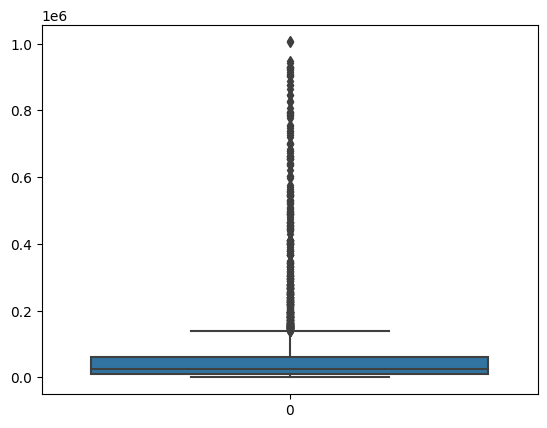

In [22]:
sns.boxplot(new_demographics["Population_Size"])

# **Identifying and removing outliers for 'Population Density' column**

<Axes: >

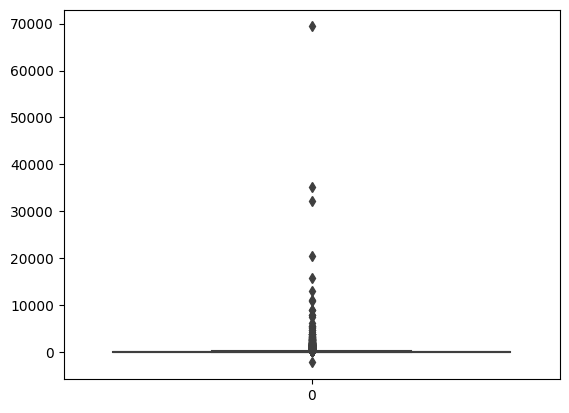

In [23]:
sns.boxplot(demographics_df["Population_Density"])

In [24]:
upperlimit=demographics_df["Population_Density"].mean()+3*demographics_df["Population_Density"].std()
lowerlimit=demographics_df["Population_Density"].mean()-3*demographics_df["Population_Density"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 5358.245041302563
lowerlimit: -4860.006263843155


In [25]:
demographics_df.loc[(demographics_df["Population_Density"]>upperlimit)|(demographics_df["Population_Density"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
221,California,6,SanFrancisco,75,3,"frontier status, population size, poverty",39,739426,15837,12.000000,15.700000,69.599998,14.799999,56.599998,7.300000,0.5,33.299999,13.500000
317,District of Columbia,11,Washington,1,3,"frontier status, population size, poverty",39,550521,8966,17.500000,21.500000,66.300003,12.300000,38.000000,57.000000,0.3,3.200000,8.400000
608,Illinois,17,Cook,31,1,"frontier status, population size",34,5303683,5608,14.500000,27.100000,61.200001,11.700000,66.599998,26.400000,0.4,5.500000,22.100000
1214,Maryland,24,BaltimoreCity,510,3,"frontier status, population size, poverty",39,635815,7869,19.600000,27.100000,60.799999,12.099999,31.700001,64.900002,0.3,1.900000,2.200000
1227,Massachusetts,25,Suffolk,25,3,"frontier status, population size, poverty",39,654428,11183,15.900000,22.400000,66.400002,11.200000,65.099998,24.900000,0.5,7.800000,17.200001
1595,Missouri,29,St.LouisCity,510,5,"frontier status, population size, poverty",25,344362,5561,21.299999,26.600000,61.200001,12.200000,45.599998,50.700001,0.3,2.100000,2.400000
1778,New Jersey,34,Essex,13,3,"frontier status, population size, poverty",39,791057,6265,14.400000,28.100000,60.400002,11.600000,51.400002,42.599998,0.3,4.400000,17.200001
1780,New Jersey,34,Hudson,17,3,"frontier status, population size, poverty",39,603521,12926,15.000000,24.600000,64.400002,11.099999,71.099998,15.100000,0.6,11.100000,40.099998
1828,New York,36,Bronx,5,1,"frontier status, population size",34,1357589,32300,26.799999,30.700001,59.099998,10.200000,49.599998,42.500000,1.2,4.000000,49.500000
1849,New York,36,Kings,47,1,"frontier status, population size",34,2486235,35211,23.299999,27.400000,60.500000,12.000000,50.599998,38.299999,0.5,9.000000,19.500000


In [26]:
new_demographics=demographics_df.loc[(demographics_df["Population_Density"]<upperlimit)&(demographics_df["Population_Density"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3124
outliers: 17


<Axes: >

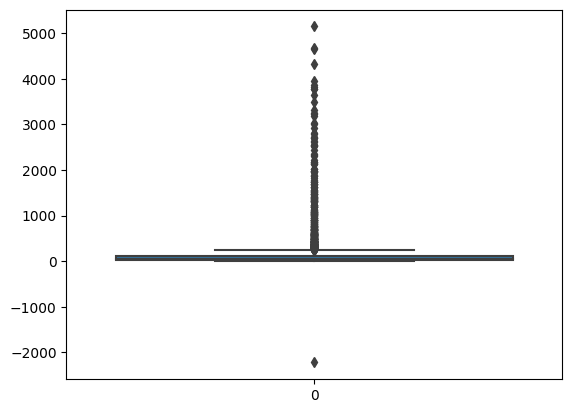

In [27]:
sns.boxplot(new_demographics["Population_Density"])

# **Identifying and removing outliers for 'poverty rate' column**

<Axes: >

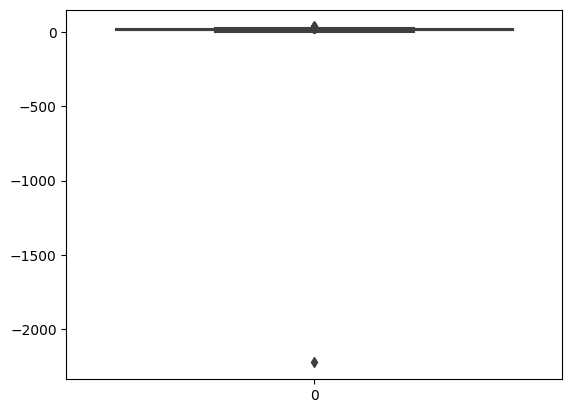

In [28]:
sns.boxplot(demographics_df["Poverty_rate"])

In [29]:
upperlimit=demographics_df["Poverty_rate"].mean()+3*demographics_df["Poverty_rate"].std()
lowerlimit=demographics_df["Poverty_rate"].mean()-3*demographics_df["Poverty_rate"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 133.19780349731445
lowerlimit: -107.92094802856445


In [30]:
demographics_df.loc[(demographics_df["Poverty_rate"]>upperlimit)|(demographics_df["Poverty_rate"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
546,Hawaii,15,Kalawao,5,37,"frontier status, population size, poverty, age",30,111,8,-2222.199951,1.4,82.300003,16.200001,41.400002,0.0,0.0,55.900002,5.4


In [31]:
new_demographics=demographics_df.loc[(demographics_df["Poverty_rate"]<upperlimit)&(demographics_df["Poverty_rate"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3140
outliers: 1


<Axes: >

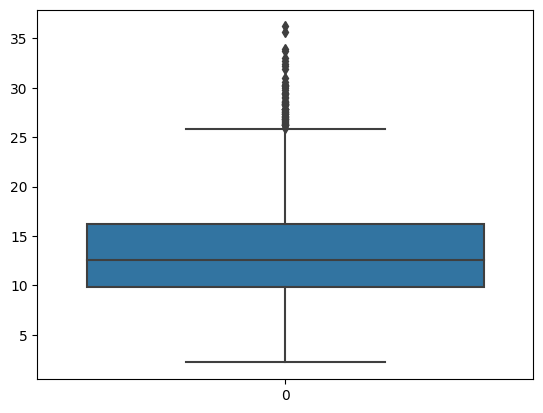

In [32]:
sns.boxplot(new_demographics["Poverty_rate"])

# **Identifying and removing outliers for 'Age 19 under' column**

<Axes: >

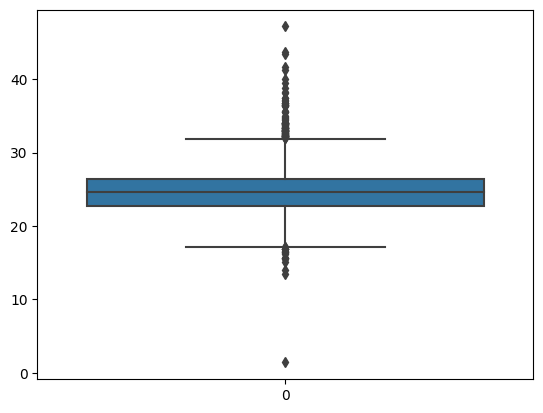

In [33]:
sns.boxplot(demographics_df["Age_19_Under"])

In [34]:
upperlimit=demographics_df["Age_19_Under"].mean()+3*demographics_df["Age_19_Under"].std()
lowerlimit=demographics_df["Age_19_Under"].mean()-3*demographics_df["Age_19_Under"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 34.65185832977295
lowerlimit: 14.961194038391113


In [35]:
demographics_df.loc[(demographics_df["Age_19_Under"]>upperlimit)|(demographics_df["Age_19_Under"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
67,Alaska,2,AleutiansEast,13,80,"frontier status, population size, poverty, age",41,2713,0,11.700000,13.400000,83.199997,3.400000,33.400002,1.9,29.600000,33.500000,14.800000
68,Alaska,2,AleutiansWest,16,78,"frontier status, population size, poverty, age",43,5382,1,7.300000,14.000000,83.300003,2.700000,48.700001,3.8,18.700001,26.799999,12.000000
70,Alaska,2,Bethel,50,86,"frontier status, population size, poverty, age",38,17127,0,20.900000,41.200001,53.799999,5.000000,13.400000,0.6,82.000000,1.300000,1.100000
73,Alaska,2,Dillingham,70,83,"frontier status, population size, poverty, age",29,4926,0,18.100000,36.799999,56.599998,6.600000,23.500000,0.5,71.300003,0.500000,2.500000
82,Alaska,2,Nome,180,83,"frontier status, population size, poverty, age",29,9328,0,17.400000,37.500000,56.599998,5.900000,20.000000,0.5,75.699997,1.100000,1.100000
83,Alaska,2,NorthSlope,185,80,"frontier status, population size, poverty, age",41,6924,0,11.600000,39.500000,55.400002,5.100000,15.700000,1.1,72.000000,7.100000,3.900000
84,Alaska,2,NorthwestArctic,188,83,"frontier status, population size, poverty, age",29,7621,0,17.000000,41.700001,53.099998,5.200000,13.100000,0.1,83.599998,1.000000,5.600000
90,Alaska,2,WadeHampton,270,88,"frontier status, population size, poverty, age",23,7541,0,25.100000,47.200001,47.599998,5.100000,4.700000,0.0,93.400002,0.100000,0.400000
94,Arizona,4,Apache,1,77,"frontier status, population size",15,69343,6,27.500000,36.799999,53.500000,9.700000,22.200001,0.6,76.099998,0.300000,4.600000
473,Georgia,13,Liberty,179,23,"frontier status, population size, poverty, age",37,57544,111,15.100000,37.200001,57.799999,5.000000,49.400002,44.5,0.500000,2.400000,6.900000


In [36]:
new_demographics=demographics_df.loc[(demographics_df["Age_19_Under"]<upperlimit)&(demographics_df["Age_19_Under"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3109
outliers: 32


<Axes: >

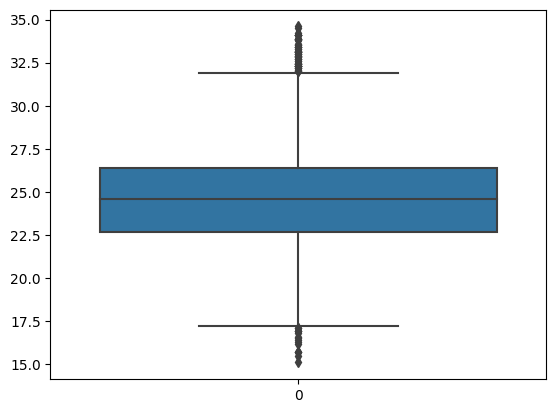

In [37]:
sns.boxplot(new_demographics["Age_19_Under"])

# **Identifying and removing outliers for 'Age 19-64' column**

<Axes: >

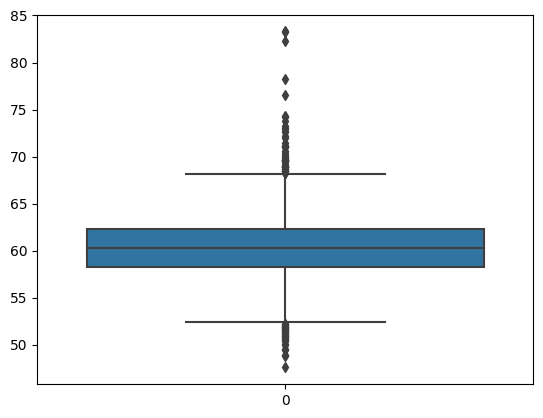

In [38]:
sns.boxplot(demographics_df["Age_19_64"])

In [39]:
upperlimit=demographics_df["Age_19_64"].mean()+3*demographics_df["Age_19_64"].std()
lowerlimit=demographics_df["Age_19_64"].mean()-3*demographics_df["Age_19_64"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 70.3575668334961
lowerlimit: 50.221229553222656


In [40]:
demographics_df.loc[(demographics_df["Age_19_64"]>upperlimit)|(demographics_df["Age_19_64"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
67,Alaska,2,AleutiansEast,13,80,"frontier status, population size, poverty, age",41,2713,0,11.700000,13.400000,83.199997,3.400000,33.400002,1.900000,29.600000,33.500000,14.800000
68,Alaska,2,AleutiansWest,16,78,"frontier status, population size, poverty, age",43,5382,1,7.300000,14.000000,83.300003,2.700000,48.700001,3.800000,18.700001,26.799999,12.000000
72,Alaska,2,Denali,68,78,"frontier status, population size, poverty, age",43,1881,0,6.600000,22.400000,73.000000,4.700000,89.599998,1.300000,4.700000,2.300000,2.800000
90,Alaska,2,WadeHampton,270,88,"frontier status, population size, poverty, age",23,7541,0,25.100000,47.200001,47.599998,5.100000,4.700000,0.000000,93.400002,0.100000,0.400000
201,California,6,Lassen,35,32,"frontier status, population size, poverty, age",37,34751,8,14.900000,20.700001,70.400002,8.900000,84.300003,9.500000,3.100000,1.400000,14.900000
252,Colorado,8,ClearCreek,19,37,"frontier status, population size, poverty, age",30,9197,23,6.800000,21.900000,71.000000,7.000000,97.300003,0.400000,0.900000,0.700000,4.200000
255,Colorado,8,Crowley,25,87,"frontier status, population size, poverty, age",32,5401,7,25.500000,18.500000,71.099998,10.299999,88.699997,7.300000,2.700000,0.900000,23.299999
261,Colorado,8,Eagle,37,47,"frontier status, population size, poverty, age...",34,47530,28,6.400000,24.700001,71.500000,3.700000,97.300003,0.600000,0.600000,1.000000,26.900000
266,Colorado,8,Gilpin,47,37,"frontier status, population size, poverty, age",30,4932,33,5.800000,20.400000,72.800003,6.800000,96.400002,0.900000,0.600000,1.300000,4.600000
268,Colorado,8,Gunnison,51,80,"frontier status, population size, poverty, age",41,14226,4,11.700000,21.299999,71.099998,7.500000,96.800003,0.600000,1.000000,0.700000,5.800000


In [41]:
new_demographics=demographics_df.loc[(demographics_df["Age_19_64"]<upperlimit)&(demographics_df["Age_19_64"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3113
outliers: 28


<Axes: >

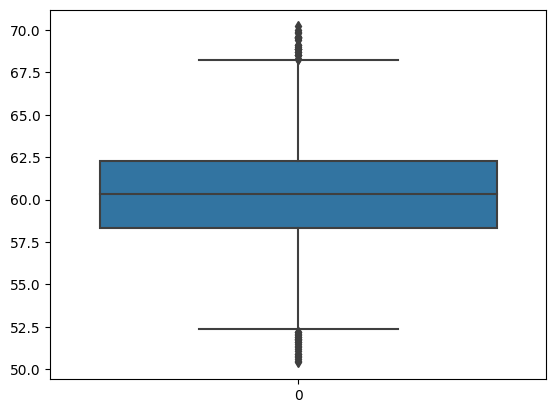

In [42]:
sns.boxplot(new_demographics["Age_19_64"])

# **Identifying and removing outliers for 'Age 65 and over' column**

<Axes: >

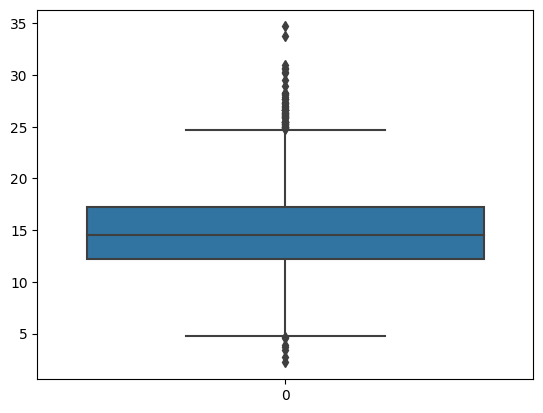

In [43]:
sns.boxplot(demographics_df["Age_65_and_over"])

In [44]:
upperlimit=demographics_df["Age_65_and_over"].mean()+3*demographics_df["Age_65_and_over"].std()
lowerlimit=demographics_df["Age_65_and_over"].mean()-3*demographics_df["Age_65_and_over"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 27.23773956298828
lowerlimit: 2.571939468383789


In [45]:
demographics_df.loc[(demographics_df["Age_65_and_over"]>upperlimit)|(demographics_df["Age_65_and_over"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
100,Arizona,4,LaPaz,12,88,"frontier status, population size, poverty, age",23,20238,4,17.200001,20.600000,50.400002,28.900000,84.199997,1.000000,13.2,0.6,22.799999
325,Florida,12,Charlotte,15,13,"frontier status, population size, poverty, age",16,157536,227,9.300000,16.200001,50.099998,33.799999,92.699997,5.300000,0.2,1.1,4.200000
326,Florida,12,Citrus,17,6,"frontier status, population size, poverty",53,134370,230,12.400000,17.400000,51.900002,30.600000,94.900002,2.800000,0.4,1.1,3.400000
344,Florida,12,Highlands,55,24,"frontier status, population size, poverty, age",35,95496,93,13.900000,20.000000,48.900002,31.000000,88.000000,9.600000,0.5,1.3,15.000000
375,Florida,12,Sarasota,115,10,"frontier status, population size, poverty, age",36,366256,641,8.400000,17.500000,53.000000,29.500000,93.400002,4.500000,0.2,1.1,6.200000
410,Georgia,13,Chattahoochee,53,39,"frontier status, population size, poverty, age",51,14679,59,14.500000,33.099998,64.599998,2.200000,65.300003,28.799999,0.8,2.9,10.500000
977,Kansas,20,Smith,183,81,"frontier status, population size, poverty, age",58,4121,5,10.300000,19.299999,53.000000,27.700001,99.000000,0.200000,0.2,0.3,0.900000
1389,Minnesota,27,Traverse,155,58,"frontier status, population size, poverty, age...",48,3810,7,10.400000,22.100000,50.500000,27.299999,95.099998,0.000000,4.3,0.4,1.400000
1686,Nebraska,31,Garden,69,79,"frontier status, population size, poverty, age",33,1997,1,12.700000,17.500000,54.599998,27.900000,99.300003,0.100000,0.2,0.3,1.800000
1697,Nebraska,31,Hooker,91,84,"frontier status, population size, poverty, age",52,744,1,9.000000,20.299999,52.400002,27.299999,99.199997,0.000000,0.3,0.1,1.100000


In [46]:
new_demographics=demographics_df.loc[(demographics_df["Age_65_and_over"]<upperlimit)&(demographics_df["Age_65_and_over"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3120
outliers: 21


<Axes: >

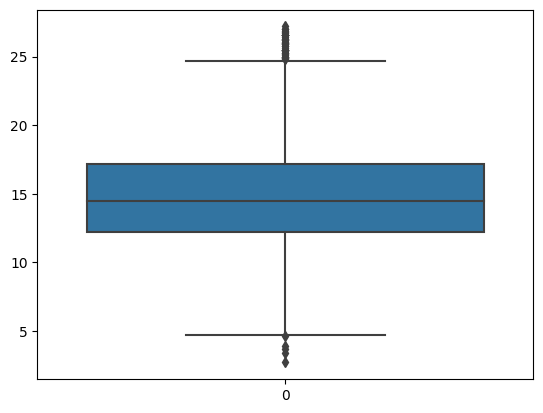

In [47]:
sns.boxplot(new_demographics["Age_65_and_over"])

# **Identifying and removing outliers for 'White' column**

<Axes: >

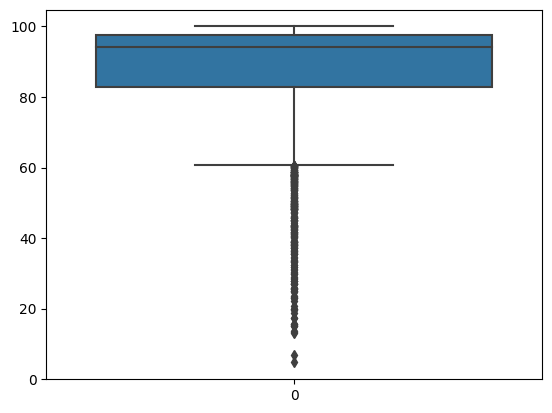

In [48]:
sns.boxplot(demographics_df["White"])

In [49]:
upperlimit=demographics_df["White"].mean()+3*demographics_df["White"].std()
lowerlimit=demographics_df["White"].mean()-3*demographics_df["White"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 135.4693260192871
lowerlimit: 38.56645584106445


In [50]:
demographics_df.loc[(demographics_df["White"]>upperlimit)|(demographics_df["White"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
5,Alabama,1,Bullock,11,75,"frontier status, population size, poverty, age...",37,11055,18,26.200001,24.700001,63.200001,12.200000,27.799999,71.400002,0.400000,0.2,5.9
23,Alabama,1,Dallas,47,52,"frontier status, population size, poverty, age...",40,44366,45,25.000000,29.000000,57.400002,13.600000,32.400002,66.900002,0.100000,0.3,0.6
31,Alabama,1,Greene,63,75,"frontier status, population size, poverty, age...",37,9661,15,24.900000,28.000000,57.900002,14.100000,19.900000,79.699997,0.100000,0.2,0.7
42,Alabama,1,Lowndes,85,66,"frontier status, population size, poverty, age...",37,13076,18,23.299999,29.000000,58.200001,12.800000,27.900000,71.699997,0.100000,0.1,0.8
43,Alabama,1,Macon,87,44,"frontier status, population size, poverty, age",33,22810,37,25.799999,27.000000,58.599998,14.400000,15.700000,82.800003,0.100000,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,South Dakota,46,Todd,121,66,"frontier status, population size, poverty, age...",37,9882,7,33.700001,43.400002,50.799999,5.800000,15.000000,0.200000,83.199997,0.2,2.6
2425,South Dakota,46,Ziebach,137,86,"frontier status, population size, poverty, age",38,2631,1,33.000000,36.500000,56.299999,7.200000,25.500000,0.000000,74.000000,0.3,1.1
2905,Virginia,51,Sussex,183,71,"frontier status, population size, poverty, age...",33,12071,25,17.000000,19.200001,66.900002,13.900001,38.000000,61.200001,0.000000,0.3,1.2
2939,Virginia,51,PetersburgCity,730,32,"frontier status, population size, poverty, age",37,32604,1425,18.500000,27.000000,56.799999,16.299999,19.700001,78.599998,0.100000,0.9,2.0


In [51]:
new_demographics=demographics_df.loc[(demographics_df["White"]<upperlimit)&(demographics_df["White"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3067
outliers: 74


<Axes: >

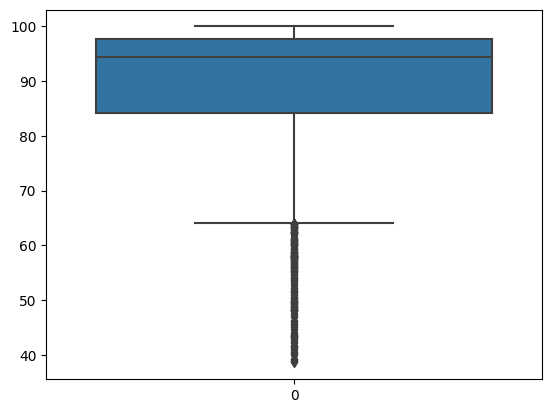

In [52]:
sns.boxplot(new_demographics["White"])

# **Identifying and removing outliers for 'Black' column**

<Axes: >

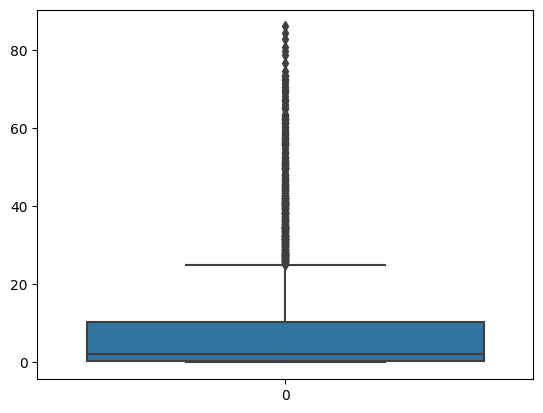

In [53]:
sns.boxplot(demographics_df["Black"])

In [54]:
upperlimit=demographics_df["Black"].mean()+3*demographics_df["Black"].std()
lowerlimit=demographics_df["Black"].mean()-3*demographics_df["Black"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 52.6236686706543
lowerlimit: -34.650285720825195


In [55]:
demographics_df.loc[(demographics_df["Black"]>upperlimit)|(demographics_df["Black"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
5,Alabama,1,Bullock,11,75,"frontier status, population size, poverty, age...",37,11055,18,26.200001,24.700001,63.200001,12.200000,27.799999,71.400002,0.4,0.2,5.9
23,Alabama,1,Dallas,47,52,"frontier status, population size, poverty, age...",40,44366,45,25.000000,29.000000,57.400002,13.600000,32.400002,66.900002,0.1,0.3,0.6
31,Alabama,1,Greene,63,75,"frontier status, population size, poverty, age...",37,9661,15,24.900000,28.000000,57.900002,14.100000,19.900000,79.699997,0.1,0.2,0.7
32,Alabama,1,Hale,65,76,"frontier status, population size, poverty, age...",38,18316,28,20.600000,26.799999,60.599998,12.599999,40.299999,59.200001,0.1,0.2,0.9
42,Alabama,1,Lowndes,85,66,"frontier status, population size, poverty, age...",37,13076,18,23.299999,29.000000,58.200001,12.800000,27.900000,71.699997,0.1,0.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,Virginia,51,Sussex,183,71,"frontier status, population size, poverty, age...",33,12071,25,17.000000,19.200001,66.900002,13.900001,38.000000,61.200001,0.0,0.3,1.2
2922,Virginia,51,EmporiaCity,595,41,"frontier status, population size, poverty, age",47,5587,811,16.400000,25.900000,54.799999,19.400000,41.200001,58.200001,0.0,0.6,2.8
2925,Virginia,51,FranklinCity,620,41,"frontier status, population size, poverty, age",47,8594,1029,17.299999,26.700001,56.099998,17.200001,43.200001,55.700001,0.2,0.8,1.1
2939,Virginia,51,PetersburgCity,730,32,"frontier status, population size, poverty, age",37,32604,1425,18.500000,27.000000,56.799999,16.299999,19.700001,78.599998,0.1,0.9,2.0


In [56]:
new_demographics=demographics_df.loc[(demographics_df["Black"]<upperlimit)&(demographics_df["Black"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3061
outliers: 80


<Axes: >

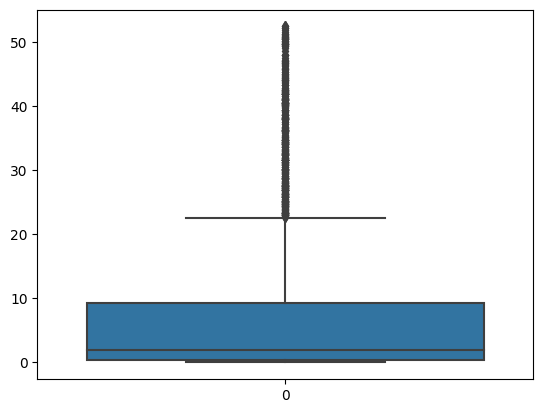

In [57]:
sns.boxplot(new_demographics["Black"])

# **Identifying and removing outliers for 'Native American' column**

<Axes: >

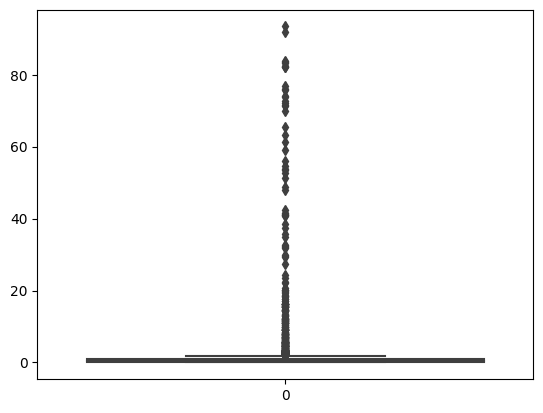

In [58]:
sns.boxplot(demographics_df["Native_American"])

In [59]:
upperlimit=demographics_df["Native_American"].mean()+3*demographics_df["Native_American"].std()
lowerlimit=demographics_df["Native_American"].mean()-3*demographics_df["Native_American"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 25.000580549240112
lowerlimit: -21.052092790603638


In [60]:
demographics_df.loc[(demographics_df["Native_American"]>upperlimit)|(demographics_df["Native_American"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
67,Alaska,2,AleutiansEast,13,80,"frontier status, population size, poverty, age",41,2713,0,11.700000,13.400000,83.199997,3.400000,33.400002,1.900000,29.600000,33.5,14.800000
70,Alaska,2,Bethel,50,86,"frontier status, population size, poverty, age",38,17127,0,20.900000,41.200001,53.799999,5.000000,13.400000,0.600000,82.000000,1.3,1.100000
71,Alaska,2,BristolBay,60,78,"frontier status, population size, poverty, age",43,1112,2,8.100000,26.500000,67.599998,6.000000,57.599998,0.600000,41.400002,0.3,1.000000
73,Alaska,2,Dillingham,70,83,"frontier status, population size, poverty, age",29,4926,0,18.100000,36.799999,56.599998,6.600000,23.500000,0.500000,71.300003,0.5,2.500000
80,Alaska,2,LakeandPeninsula,164,83,"frontier status, population size, poverty, age",29,1570,0,16.600000,34.099998,59.000000,6.800000,23.400000,0.000000,71.500000,0.8,1.300000
82,Alaska,2,Nome,180,83,"frontier status, population size, poverty, age",29,9328,0,17.400000,37.500000,56.599998,5.900000,20.000000,0.500000,75.699997,1.1,1.100000
83,Alaska,2,NorthSlope,185,80,"frontier status, population size, poverty, age",41,6924,0,11.600000,39.500000,55.400002,5.100000,15.700000,1.100000,72.000000,7.1,3.900000
84,Alaska,2,NorthwestArctic,188,83,"frontier status, population size, poverty, age",29,7621,0,17.000000,41.700001,53.099998,5.200000,13.100000,0.100000,83.599998,1.0,5.600000
85,Alaska,2,PrinceofWales-OuterKetchikan,201,80,"frontier status, population size, poverty, age",41,5660,1,13.800000,26.799999,64.900002,8.300000,53.500000,0.200000,40.900002,0.4,2.400000
87,Alaska,2,Skagway-Hoonah-Angoon,232,80,"frontier status, population size, poverty, age",41,3126,0,11.600000,22.799999,68.000000,9.200000,61.200001,0.200000,35.599998,0.1,4.100000


In [61]:
new_demographics=demographics_df.loc[(demographics_df["Native_American"]<upperlimit)&(demographics_df["Native_American"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3093
outliers: 48


<Axes: >

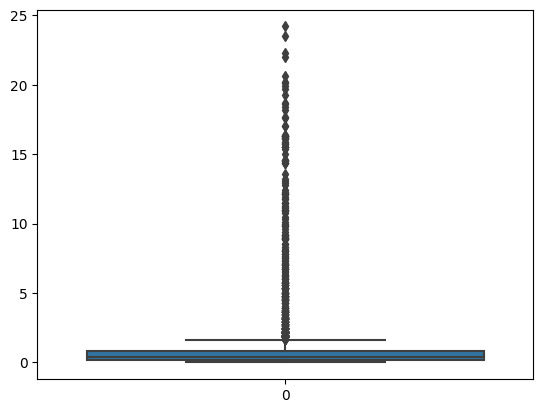

In [62]:
sns.boxplot(new_demographics["Native_American"])

# **Identifying and removing outliers for 'Asian' column**

<Axes: >

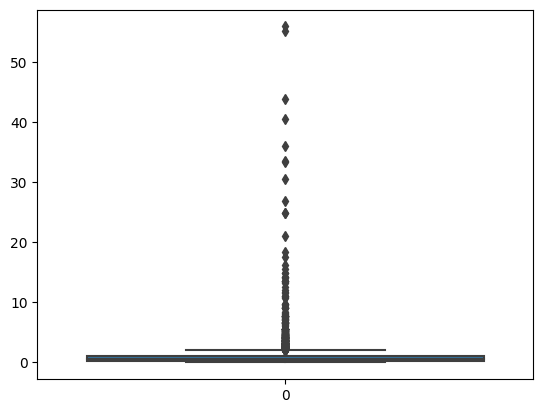

In [63]:
sns.boxplot(demographics_df["Asian"])

In [64]:
upperlimit=demographics_df["Asian"].mean()+3*demographics_df["Asian"].std()
lowerlimit=demographics_df["Asian"].mean()-3*demographics_df["Asian"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 9.3947594165802
lowerlimit: -7.1486594676971436


In [65]:
demographics_df.loc[(demographics_df["Asian"]>upperlimit)|(demographics_df["Asian"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
67,Alaska,2,AleutiansEast,13,80,"frontier status, population size, poverty, age",41,2713,0,11.700000,13.400000,83.199997,3.400000,33.400002,1.900000,29.600000,33.500000,14.800000
68,Alaska,2,AleutiansWest,16,78,"frontier status, population size, poverty, age",43,5382,1,7.300000,14.000000,83.300003,2.700000,48.700001,3.800000,18.700001,26.799999,12.000000
79,Alaska,2,KodiakIsland,150,78,"frontier status, population size, poverty, age",43,13051,2,8.700000,31.500000,62.799999,5.700000,62.099998,1.200000,15.700000,17.500000,6.700000
184,California,6,Alameda,1,1,"frontier status, population size",34,1448905,1964,10.700000,26.200001,63.299999,10.500000,56.900002,13.800000,0.700000,24.900000,20.299999
190,California,6,ContraCosta,13,2,"frontier status, population size, poverty",32,1017787,1414,7.500000,27.000000,61.599998,11.400000,72.699997,9.600000,0.700000,13.500000,20.700001
202,California,6,LosAngeles,37,1,"frontier status, population size",34,9935475,2447,17.700001,28.900000,61.000000,10.099999,74.099998,9.700000,1.100000,13.400000,46.400002
213,California,6,Orange,59,1,"frontier status, population size",34,2988072,3785,10.600000,28.100000,61.400002,10.500000,78.900002,1.900000,0.900000,16.200001,32.099998
217,California,6,Sacramento,67,1,"frontier status, population size",34,1363482,1412,13.700000,28.500000,60.599998,10.900000,70.000000,10.500000,1.100000,14.000000,18.200001
220,California,6,SanDiego,73,1,"frontier status, population size",34,2933462,698,11.600000,27.500000,61.400002,11.000000,79.800003,5.600000,1.000000,10.800000,29.000000
221,California,6,SanFrancisco,75,3,"frontier status, population size, poverty",39,739426,15837,12.000000,15.700000,69.599998,14.799999,56.599998,7.300000,0.500000,33.299999,13.500000


In [66]:
new_demographics=demographics_df.loc[(demographics_df["Asian"]<upperlimit)&(demographics_df["Asian"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
print('outliers:',len(demographics_df)-len(new_demographics))

before removing outliers: 3141
after removing outliers: 3104
outliers: 37


<Axes: >

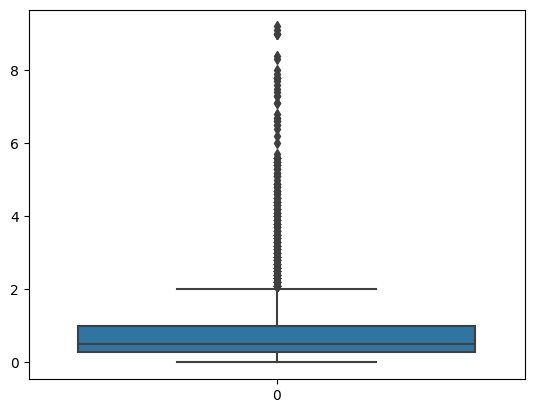

In [67]:
sns.boxplot(new_demographics["Asian"])

# **Identifying and removing outliers for 'Hispanic' column**

<Axes: >

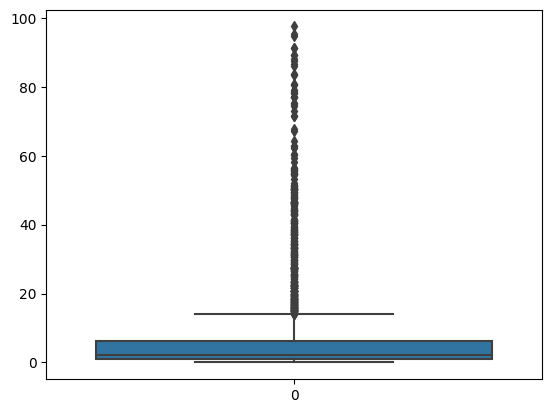

In [68]:
sns.boxplot(demographics_df["Hispanic"])

In [69]:
upperlimit=demographics_df["Hispanic"].mean()+3*demographics_df["Hispanic"].std()
lowerlimit=demographics_df["Hispanic"].mean()-3*demographics_df["Hispanic"].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)

upperlimit: 44.41216707229614
lowerlimit: -30.37619161605835


In [70]:
demographics_df.loc[(demographics_df["Hispanic"]>upperlimit)|(demographics_df["Hispanic"]<lowerlimit)]

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
99,Arizona,4,Greenlee,11,78,"frontier status, population size, poverty, age",43,7521,4,11.200000,30.000000,58.799999,11.200000,96.199997,0.8,1.9,0.5,46.400002
106,Arizona,4,SantaCruz,23,51,"frontier status, population size, poverty, age...",33,42009,34,19.200001,33.400002,55.000000,11.599999,97.699997,0.6,0.8,0.8,80.400002
108,Arizona,4,Yuma,27,7,"frontier status, population size, poverty",33,181277,33,18.000000,30.799999,51.799999,17.400000,93.000000,2.7,1.9,1.4,54.599998
189,California,6,Colusa,11,42,"frontier status, population size, poverty, age",53,21095,18,13.000000,30.500000,56.500000,13.099999,93.500000,1.0,2.4,2.5,49.099998
193,California,6,Fresno,19,3,"frontier status, population size, poverty",39,877584,147,20.600000,32.299999,58.000000,9.700000,81.400002,5.7,1.9,9.0,46.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,Texas,48,Yoakum,501,42,"frontier status, population size, poverty, age",53,7408,9,15.500000,31.100000,57.299999,11.700000,96.699997,1.8,0.9,0.6,50.500000
2773,Texas,48,Zapata,505,74,"frontier status, population size, poverty, age...",30,13373,13,27.000000,34.099998,53.799999,12.100000,98.400002,0.5,0.4,0.6,87.599998
2774,Texas,48,Zavala,507,66,"frontier status, population size, poverty, age...",37,11796,9,32.700001,33.099998,55.700001,11.299999,97.400002,1.0,1.0,0.5,91.300003
2952,Washington,53,Adams,1,42,"frontier status, population size, poverty, age",53,16803,9,15.800000,33.799999,55.400002,10.799999,96.500000,0.7,1.2,0.9,50.400002


In [71]:
new_demographics=demographics_df.loc[(demographics_df["Hispanic"]<upperlimit)&(demographics_df["Hispanic"]>lowerlimit)]
len(new_demographics)
print('before removing outliers:',len(demographics_df))
print('after removing outliers:',len(new_demographics))
outliers=len(demographics_df)-len(new_demographics)
print('outliers:',outliers)

before removing outliers: 3141
after removing outliers: 3045
outliers: 96


<Axes: >

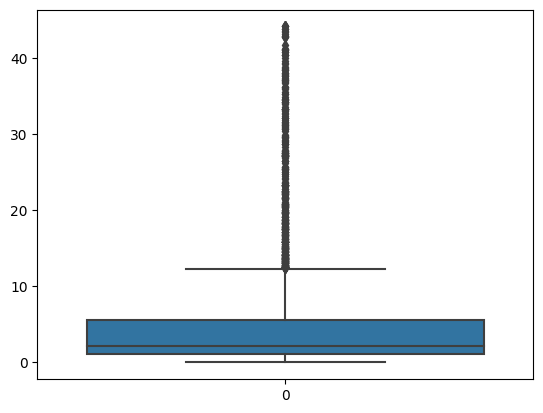

In [72]:
sns.boxplot(new_demographics["Hispanic"])

# New dataframe without outliers/ after removing outliers

In [73]:
new_demographics

,State,State_FIPS,County,County_FIPS,Strata_ID_Number,Strata_Determining_Factors,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
0,Alabama,1,Autauga,1,29,"frontier status, population size, poverty, age",37,48612,82,10.400000,26.900000,62.299999,10.700000,80.699997,17.299999,0.5,0.6,1.7
1,Alabama,1,Baldwin,3,16,"frontier status, population size, poverty, age",27,162586,102,10.200000,23.500000,60.299999,16.299999,88.400002,9.900000,0.5,0.4,2.3
2,Alabama,1,Barbour,5,51,"frontier status, population size, poverty, age...",33,28414,32,22.100000,24.299999,62.500000,13.200001,52.200001,46.799999,0.4,0.3,3.1
3,Alabama,1,Bibb,7,42,"frontier status, population size, poverty, age",53,21516,35,16.799999,24.600000,63.299999,12.099999,76.800003,22.500000,0.3,0.1,1.4
4,Alabama,1,Blount,9,28,"frontier status, population size, poverty, age",39,55725,86,11.900000,24.500000,62.099998,13.400001,97.099998,1.500000,0.5,0.2,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming,56,Sweetwater,37,77,"frontier status, population size",15,37975,4,8.600000,26.600000,65.099998,8.300000,95.500000,1.100000,1.1,1.0,10.3
3137,Wyoming,56,Teton,39,78,"frontier status, population size, poverty, age",43,19032,5,5.600000,18.799999,73.300003,7.900000,97.900002,0.200000,0.4,0.8,10.2
3138,Wyoming,56,Uinta,41,38,"frontier status, population size, poverty, age",35,19939,10,10.600000,29.100000,63.099998,7.800000,97.500000,0.100000,1.1,0.3,5.9
3139,Wyoming,56,Washakie,43,82,"frontier status, population size, poverty, age",37,7933,4,11.100000,23.500000,59.500000,16.900000,97.199997,0.200000,0.8,0.7,12.1


In [74]:
new_demographics.describe()

,State_FIPS,County_FIPS,Strata_ID_Number,CountiesPerStratum,Population_Size,Population_Density,Poverty_rate,Age_19_Under,Age_19_64,Age_65_and_over,White,Black,Native_American,Asian,Hispanic
count,3045.000000,3045.000000,3045.000000,3045.000000,3.045000e+03,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000
mean,30.069951,101.215435,44.448604,38.590476,9.011199e+04,243.394417,12.390081,24.650116,60.380161,14.970312,86.820229,9.162725,1.989064,1.117077,5.329392
std,15.043172,104.632830,24.879085,10.333886,2.478009e+05,1628.046524,40.779785,3.144708,3.320997,4.123715,16.323483,14.710937,7.786609,2.779855,7.711378
min,1.000000,1.000000,1.000000,15.000000,6.200000e+01,-2222.000000,-2222.199951,1.400000,47.599998,2.200000,4.700000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,35.000000,23.000000,32.000000,1.133100e+04,18.000000,9.700000,22.700001,58.400002,12.300000,82.199997,0.400000,0.200000,0.300000,1.100000
50%,29.000000,77.000000,44.000000,37.000000,2.534700e+04,45.000000,12.500000,24.500000,60.400002,14.500000,94.000000,2.100000,0.400000,0.500000,2.200000
75%,45.000000,131.000000,65.000000,45.000000,6.418300e+04,112.000000,15.900000,26.299999,62.400002,17.300001,97.699997,10.600000,0.800000,1.000000,5.600000
max,56.000000,840.000000,88.000000,62.000000,5.303683e+06,69390.000000,35.599998,47.200001,83.300003,34.700001,100.000000,86.000000,93.400002,55.900002,44.200001


# Capping the outliers for Population density column

In [75]:
#capping
new_demographics=demographics_df.copy()
new_demographics.loc[new_demographics['Population_Density']>upperlimit,'Population_Density']=upperlimit
new_demographics.loc[new_demographics['Population_Density']<lowerlimit,'Population_Density']=lowerlimit

<Axes: >

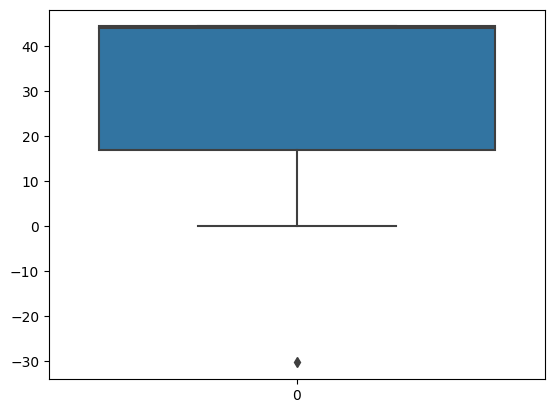

In [76]:
sns.boxplot(new_demographics["Population_Density"])

In [77]:
# in capping, the outliers are replaced with upper limit/ maximum value and lower limit/ minimum value so, the number of rows has not changed and remains the same.
len(new_demographics)

3141